Project Description: JobStreet Data Scraping and Analysis for Data Analyst Roles in Indonesia

# Install Requirement

In [1]:
#pip install selenium beautifulsoup4

Data yang Dikumpulkan & Kegunaan

Judul Pekerjaan = tahu posisi yang sedang banyak dicari.

Nama Perusahaan = tahu perusahaan mana yang sedang aktif rekrutmen.

Lokasi = tahu distribusi lowongan berdasarkan kota/wilayah.

Gaji = bisa analisis range gaji per posisi/lokasi.

Link Detail Lowongan = bisa akses detail syarat skill/job desc.

Apabila data ini digunakan pada dunia nyata untuk Job seeker adalah untuk membandingkan gaji antar perusahaan untuk posisi yang sama. kemudian untuk HR adalah sebagai Benchmark standar gaji dan kompetisi pasar kerja, sedangkan untuk Akademisi/Riset adalah untuk menkaji Tren demand profesi & lokasi pekerjaan.

# Import Library

# Scraping Data from JobStreet

# Business analyst

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
pd.options.display.max_colwidth = 300
import os

## Setup Selenium headless

In [3]:
option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
# Comment 4 code dibawah jika running di local
# 4 code dibawah ini berkaitan dengan connection ke website (umum dipake di website apapun)
# option.add_argument("--headless")
# option.add_argument("--disable-gpu")
# option.add_argument("--no-sandbox")
# option.add_argument("--remote-debugging-port=9230")
# ====== running di local maka 4 code diatas harus comment ======
driver = webdriver.Chrome(options=option)

# URL API
url = "https://id.jobstreet.com/id/bussines-analyst-jobs"
driver.get(url)
time.sleep(3)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

soup = BeautifulSoup(driver.page_source, 'html.parser')
jobs = soup.find_all('article')
# jobs itu kita ambil html strukturnya bernama article sebagai box container

In [4]:
soup

<html lang="id" prefix="og: http://ogp.me/ns#"><head>
<meta charset="utf-8"/>
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="Jobstreet" name="apple-mobile-web-app-title"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="MC4xMjk1NTk3ODgyNzg2ODQz" name="request-id"/>
<meta content="#fff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="/static/shared-web/favicon-4e1897dfd0901e8a3bf7e604d3a90636.ico" rel="icon"/>
<link href="/static/shared-web/iphone-7c4d7dcb05fece466d8901945e36bbaa.png" rel="apple-touch-icon"/>
<link href="/static/shared-web/ipad-96988dd1c0902fd20b34ce260d03729b.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/static/shared-web/iphoneRetina-c772d091f011ef7ce26f631360de4907.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/static/shared-web/ipadRetina-8a06978f3bf7985f413edcb5113c9783.png" rel="appl

In [5]:
jobs

[<article aria-label="BUSINESS ANALYST" aria-selected="false" class="_1lns5ab0 _1lns5ab1 _6c7qzn98 _6c7qzn8t _6c7qzn84 _6c7qzn7p _6c7qznbg _6c7qznb1 _6c7qznac _6c7qzn9x _6c7qzni _6c7qzn6c _6c7qzn5g _1whqz86a _1whqz868 _1whqz869 od4ez810 od4ez813 _6c7qzn34 _6c7qzn37" data-automation="normalJob" data-card-type="JobCard" data-job-id="86644919" data-testid="job-card" id="jobcard-1"><div class="_1lns5ab0 _6c7qzn50 _6c7qzn4y"><a class="_1lns5ab0 _1lns5abg _1lns5ab8 _1lns5ab0 _1lns5abg _1lns5ab8 _6c7qzn5k _6c7qznk _6c7qznl _6c7qznm _6c7qznn _6c7qzn8" data-automation="job-list-view-job-link" href="/id/job/86644919?type=standard&amp;ref=search-standalone#sol=5721511053fbb12fecfa20b0449eb9543622f898" rel="nofollow" target="_blank"></a></div><div class="_1lns5ab0 _6c7qzn4w _6c7qzn52"><a class="_1lns5ab0 _1lns5abg _1lns5ab8 _1lns5ab0 _1lns5abg _1lns5ab8 _6c7qzn5k _6c7qznk _6c7qznl _6c7qznm _6c7qznn _6c7qzn8" data-automation="job-list-item-link-overlay" data-run-click-only="true" data-testid="job-l

In [6]:
# position / job title
for job in jobs:
    # title = job.find('a', {'data-testid': 'job-card-title'})
    title = job.find('a', {'data-automation': 'jobTitle'})
    if title:
        print(title.text.strip())

BUSINESS ANALYST
Business Analyst
Business Analyst
IT Business Analyst (BA)
Business Analyst Staff
BUSINESS ANALYST
Corporate Business Strategic Analyst
IT PM Business Analyst
Odoo Business Analyst
International Business Analyst (Sales)
DIGITAL BUSINESS ANALYST
Data Analyst for FnB Industri
Division Head Business Analyst & Perfomance
Procurement Business Partner/Analyst
Business Process Management Analyst
IT Project Manager
Business Analyst
IT Business Analyst
IT Project Manager
Business Performance Analysis
Research Analyst (Database Division)
Business Analyst
Business Analyst - AI Solution
FINANCE ANALYST
Business Analyst (handle TIMOR)
Assistant Manager Business Analyst
Business Process Staff
IT Development - Project Management Staff
Operation Data Analyst
IT Project Manager
Business Analyst
CONSOLIDATION REPORTING & BUSINESS ANALYST STAFF


In [7]:
# Company
for job in jobs:
    company = job.find('a', {'data-automation': 'jobCompany'})
#     company = job.find('a', {'data-type': 'company'})
    if company:
        print(company.text.strip())


PT Surya Cipta Sempurna
PT Gurita Lintas Samudera
PT Exaque Mandiri Makmur
PT PESONNA OPTIMA JASA
Indofood Group
PT Prym Intimates Indonesia
PT Dipo Star Finance
PT Insura Media Solusi (Jakarta)
PT Goja Solutions Indonesia
PT Indolakto - Indofood CBP (INDOMILK)
PT Ifabula Digital Kreasi
PT Rajafa Boga Dunia
PT Morula Indonesia
PT SMART,Tbk
PT Sarana Yukti Bandhana
PT Hitachi eBworx Indonesia
PT Amartha Mikro Fintek (Jakarta)
PT Iweka Digital Solusi
Rajah & Tann Singapore LLP
PT. Dwidaya World Wide
CEICdata.com (M) Sdn Bhd
PT Indomobil Sukses Internasional, Tbk
Newtronic Solution
PT Alun Indah
Indofood Group
PT. Bali Pawiwahan (Coco Group Bali)
PT Jaya Mitra Kurnia
PT Maybank Indonesia Finance
PT. KTC COAL MINING & ENERGY
PT. SUKSES MAKMUR INDONESIA
PT Jhonlin Group


In [8]:
# location
for job in jobs:
    location = job.find('a', {'data-automation': 'jobLocation'})
    if location:
        print(location.text.strip())


Jakarta Barat
Jakarta Barat
Jakarta Selatan
Jakarta Pusat
Kebayoran Lama
Semarang
Jakarta Pusat
Jakarta Raya
Jakarta Raya
Jakarta Raya
Jakarta Raya
Jakarta Raya
Jakarta Pusat
Jakarta Raya
Jakarta Selatan
Jakarta Pusat
Kebayoran Lama
Medan
Jakarta Selatan
Jakarta Barat
Jakarta Raya
Jakarta Timur
Bandung
Jakarta Raya
Jakarta Selatan
Kuta Selatan
Bandung
Jakarta Pusat
Samarinda
Waru
Jakarta Utara
Batu Licin


In [9]:
# Salary
for job in jobs:
    salary = job.find('span', {'data-automation': 'jobSalary'})
    print(salary.text.strip() if salary else 'NaN')

Rp 6.500.000 – Rp 8.000.000 per month
NaN
Rp 6.000.000 – Rp 8.500.000 per month
Rp 7.000.000 – Rp 10.000.000 per month
NaN
NaN
Rp 8.000.000 – Rp 10.000.000 per month
Rp 10.000.000 – Rp 15.000.000 per month
NaN
NaN
Rp 6.000.000 – Rp 7.500.000 per month
Rp 10.000.000 – Rp 13.000.000 per month
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
Rp 6,000,000 – Rp 7,000,000 per month
NaN
Rp 6.000.000 – Rp 8.000.000 per month
NaN
NaN
Rp 6.000.000 – Rp 8.000.000 per month
Rp 4.000.000 – Rp 4.500.000 per month
NaN
NaN
NaN
NaN
NaN


### Additional API URL href

In [10]:
title

<a class="_1lns5ab0 _1lns5abg _1lns5ab8 _1lns5ab0 _1lns5abg _1lns5ab8 _1whqz86d _1whqz86f" data-automation="jobTitle" data-run-click-only="true" data-testid="job-card-title" href="/id/job/86386594?type=standard&amp;ref=search-standalone&amp;origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f" id="job-title-86386594" rel="nofollow" target="_self">CONSOLIDATION REPORTING &amp; BUSINESS ANALYST STAFF</a>

In [11]:
title['href']
# id/job/86357632?type=standard&ref=search-standalone&origin=cardTitle#sol=d1d929d17b9d464d1f64944c1d4d2257aa41c9aa#

'/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f'

In [12]:
# https://id.jobstreet.com/id/Data-Scientist-jobs
# https://id.jobstreet.com/id/job/86357632?type=standard&ref=search-standalone&origin=cardTitle#sol=d1d929d17b9d464d1f64944c1d4d2257aa41c9aa# Link
for job in jobs:
    link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'
    print(link)

https://id.jobstreet.com/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f
https://id.jobstreet.com/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f
https://id.jobstreet.com/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f
https://id.jobstreet.com/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f
https://id.jobstreet.com/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f
https://id.jobstreet.com/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f
https://id.jobstreet.com/id/job/86386594?type=standard&ref=search-standalone&origin=cardTitle#sol=c0edbd7023ed9d37409809c22ab58cdc0c81f47f
https://id.jobstreet.com/id

## Looping for Collecting Data

In [13]:
MAX_PAGES = 30

for page in range(1, MAX_PAGES + 1):
    print(page)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [14]:
results = [] # List to store the result
MAX_PAGES = 30  # Maximal pages

for page in range(1, MAX_PAGES + 1):
    url = f"https://id.jobstreet.com/id/bussines-analyst-jobs?page={page}" # URL website -> Akses dari API
    print(f"Scraping page {page}...")
    driver.get(url)
    time.sleep(3)  # Waiting for page loading

    # Scroll to End Content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

    # Parse HTML
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs = soup.find_all('article')

    for job in jobs:
        title = job.find('a', {'data-automation': 'jobTitle'})
        company = job.find('a', {'data-automation': 'jobCompany'})
        location = job.find('a', {'data-automation': 'jobLocation'})
        salary = job.find('span', {'data-automation': 'jobSalary'})
        link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'

        if title and company and location:
            job_info = {
                'title': title.text.strip(),
                'company': company.text.strip(),
                'location': location.text.strip(),
                'salary': salary.text.strip() if salary else 'NaN',
                'link': link
            }
            results.append(job_info)

driver.quit()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...


In [15]:
# Convert to DataFrame
df_job = pd.DataFrame(results)
df_job.head()

,title,company,location,salary,link
0,BUSINESS ANALYST,PT Surya Cipta Sempurna,Jakarta Barat,Rp 6.500.000 – Rp 8.000.000 per month,https://id.jobstreet.com/id/job/86644919?type=standard&ref=search-standalone&origin=cardTitle#sol=83c7ae8b3cd302b7bbf7c0dde19b27ff38f47028
1,Business Analyst,PT Gurita Lintas Samudera,Jakarta Barat,NaN,https://id.jobstreet.com/id/job/86610507?type=standard&ref=search-standalone&origin=cardTitle#sol=24d6af506a429627cba40d90959d0af7f4e8678f
2,Business Analyst,PT Exaque Mandiri Makmur,Jakarta Selatan,Rp 6.000.000 – Rp 8.500.000 per month,https://id.jobstreet.com/id/job/86614301?type=standard&ref=search-standalone&origin=cardTitle#sol=7d3bef681b96b285cbe19dbcd34c308fd1a5d995
3,Business Analyst Staff,Indofood Group,Kebayoran Lama,NaN,https://id.jobstreet.com/id/job/86661281?type=standard&ref=search-standalone&origin=cardTitle#sol=b855d3ea767a7f87569b70f879e3a612fe427808
4,IT Business Analyst (BA),PT PESONNA OPTIMA JASA,Jakarta Pusat,Rp 7.000.000 – Rp 10.000.000 per month,https://id.jobstreet.com/id/job/86636921?type=standard&ref=search-standalone&origin=cardTitle#sol=ae42cc05f2a2f717a5d1e108bf7a73c665af351a


In [16]:
# Save to CSV format
df_job.to_csv('jobstreet_bussines_analyst_all_pages.csv', index=False)
print(f"\n Total lowongan terkumpul: {len(df_job)}")
# dari csv bisa disave ke database


 Total lowongan terkumpul: 936


# Data Scientist

In [17]:
option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
# Comment 4 code dibawah jika running di local
# 4 code dibawah ini berkaitan dengan connection ke website (umum dipake di website apapun)
# 4 code dibawah ini berkaitan dengan connection ke website (umum dipake di website apapun)
# option.add_argument("--headless")
# option.add_argument("--disable-gpu")
# option.add_argument("--no-sandbox")
# option.add_argument("--remote-debugging-port=9230")
# ====== running di local maka 4 code diatas harus comment ======
driver = webdriver.Chrome(options=option)

# URL API
url = "https://id.jobstreet.com/id/data-scientist-jobs"
driver.get(url)
time.sleep(3)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

soup = BeautifulSoup(driver.page_source, 'html.parser')
jobs = soup.find_all('article')
# jobs itu kita ambil html strukturnya bernama article sebagai box container

In [18]:
title

<a class="_1lns5ab0 _1lns5abg _1lns5ab8 _1lns5ab0 _1lns5abg _1lns5ab8 _1whqz86d _1whqz86f" data-automation="jobTitle" data-run-click-only="true" data-testid="job-card-title" href="/id/job/85235340?type=standard&amp;ref=search-standalone&amp;origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed" id="job-title-85235340" rel="nofollow" target="_self">Product Designer &amp; Insight Analyst</a>

In [19]:
title['href']

'/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed'

In [20]:
for job in jobs:
    link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'
    print(link)


https://id.jobstreet.com/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed
https://id.jobstreet.com/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed
https://id.jobstreet.com/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed
https://id.jobstreet.com/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed
https://id.jobstreet.com/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed
https://id.jobstreet.com/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed
https://id.jobstreet.com/id/job/85235340?type=standard&ref=search-standalone&origin=cardTitle#sol=20e743af9b9dc83eeb5e06f803ee116fd4947eed
https://id.jobstreet.com/id

In [21]:
MAX_PAGES = 9
for page in range(1, MAX_PAGES + 1):
    print(page)


1
2
3
4
5
6
7
8
9


In [22]:
results = [] # List to store the result
MAX_PAGES = 9 # Maximal pages
for page in range(1, MAX_PAGES + 1):
    url = f"https://id.jobstreet.com/id/data-scientist-jobs?page={page}" # URL website -> Akses dari API
    print(f"Scraping page {page}...")
    driver.get(url)
    time.sleep(3)  # Waiting for page loading

    # Scroll to End Content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

    # Parse HTML
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs = soup.find_all('article')

    for job in jobs:
        title = job.find('a', {'data-automation': 'jobTitle'})
        company = job.find('a', {'data-automation': 'jobCompany'})
        location = job.find('a', {'data-automation': 'jobLocation'})
        salary = job.find('span', {'data-automation': 'jobSalary'})
        link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'

        if title and company and location:
            job_info = {
                'title': title.text.strip(),
                'company': company.text.strip(),
                'location': location.text.strip(),
                'salary': salary.text.strip() if salary else 'NaN',
                'link': link
            }
            results.append(job_info)

driver.quit()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...


In [23]:
# Convert to DataFrame
df_job = pd.DataFrame(results)
df_job.head()

,title,company,location,salary,link
0,Data Scientist,"PT SMART,Tbk",Jakarta Raya,NaN,https://id.jobstreet.com/id/job/86674810?type=standard&ref=search-standalone&origin=cardTitle#sol=3d306ceca6948cd9a000d43c35ce581f85182d07
1,Data Analyst for FnB Industri,PT Rajafa Boga Dunia,Jakarta Raya,Rp 10.000.000 – Rp 13.000.000 per month,https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=70c0c49997c884f272c55174903805ebc62eb452
2,Data Scientist,ASIA PULP AND PAPER,Tangerang Selatan,NaN,https://id.jobstreet.com/id/job/86325332?type=standard&ref=search-standalone&origin=cardTitle#sol=b89e08f537acabd249285ac33327f77dec78a2c5
3,Operation Data Analyst,PT. KTC COAL MINING & ENERGY,Samarinda,NaN,https://id.jobstreet.com/id/job/86648760?type=standard&ref=search-standalone&origin=cardTitle#sol=f34bae14e1f20afeca5743c8229f3b4ce11a8533
4,Risk Modelling Data Scientist,PT Adira Dinamika Multi Finance Tbk,Jakarta Selatan,NaN,https://id.jobstreet.com/id/job/86277866?type=standard&ref=search-standalone&origin=cardTitle#sol=4228466ff2eb752d0c06aeef4b1bdc4fc6722367


In [24]:
# Save to CSV format
df_job.to_csv('jobstreet_data_scientist_all_pages.csv', index=False)
print(f"\n Total lowongan terkumpul: {len(df_job)}")
# dari csv bisa disave ke database


 Total lowongan terkumpul: 271


# Data Engineer

In [25]:
option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
# Comment 4 code dibawah jika running di local
# 4 code dibawah ini berkaitan dengan connection ke website (umum dipake di website apapun)
# 4 code dibawah ini berkaitan dengan connection ke website (umum dipake di website apapun)
# option.add_argument("--headless")
# option.add_argument("--disable-gpu")
# option.add_argument("--no-sandbox")
# option.add_argument("--remote-debugging-port=9230")
# ====== running di local maka 4 code diatas harus comment ======
driver = webdriver.Chrome(options=option)

# URL API
url = "https://id.jobstreet.com/id/data-engineer-jobs"
driver.get(url)
time.sleep(3)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

soup = BeautifulSoup(driver.page_source, 'html.parser')
jobs = soup.find_all('article')
# jobs itu kita ambil html strukturnya bernama article sebagai box container

In [26]:
title

<a class="_1lns5ab0 _1lns5abg _1lns5ab8 _1lns5ab0 _1lns5abg _1lns5ab8 _1whqz86d _1whqz86f" data-automation="jobTitle" data-run-click-only="true" data-testid="job-card-title" href="/id/job/81971529?type=standard&amp;ref=search-standalone&amp;origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64" id="job-title-81971529" rel="nofollow" target="_self">GenAI Strategist</a>

In [27]:
title['href']

'/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64'

In [28]:
for job in jobs:
    link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'
    print(link)

https://id.jobstreet.com/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64
https://id.jobstreet.com/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64
https://id.jobstreet.com/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64
https://id.jobstreet.com/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64
https://id.jobstreet.com/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64
https://id.jobstreet.com/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64
https://id.jobstreet.com/id/job/81971529?type=standard&ref=search-standalone&origin=cardTitle#sol=18f5121f744009f71caee6f96c3cf6dceeb74f64
https://id.jobstreet.com/id

In [29]:
MAX_PAGES = 30
for page in range(1, MAX_PAGES + 1):
    print(page)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [30]:
results = [] # List to store the result
MAX_PAGES = 30 # Maximal pages
for page in range(1, MAX_PAGES + 1):
    url = f"https://id.jobstreet.com/id/data-engineer-jobs?page={page}" # URL website -> Akses dari API
    print(f"Scraping page {page}...")
    driver.get(url)
    time.sleep(3)  # Waiting for page loading

    # Scroll to End Content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

    # Parse HTML
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs = soup.find_all('article')

    for job in jobs:
        title = job.find('a', {'data-automation': 'jobTitle'})
        company = job.find('a', {'data-automation': 'jobCompany'})
        location = job.find('a', {'data-automation': 'jobLocation'})
        salary = job.find('span', {'data-automation': 'jobSalary'})
        link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'

        if title and company and location:
            job_info = {
                'title': title.text.strip(),
                'company': company.text.strip(),
                'location': location.text.strip(),
                'salary': salary.text.strip() if salary else 'NaN',
                'link': link
            }
            results.append(job_info)

driver.quit()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...


In [31]:
# Convert to DataFrame
df_job = pd.DataFrame(results)
df_job.head()

,title,company,location,salary,link
0,Data Engineer,PT. Garena Indonesia,Jakarta Raya,NaN,https://id.jobstreet.com/id/job/86683825?type=standard&ref=search-standalone&origin=cardTitle#sol=0dc473108939f8d504d4dc659725028388e9fcd6
1,Well Control Data Engineer,PT Navita Origo Solution,Jakarta Barat,NaN,https://id.jobstreet.com/id/job/86652032?type=standard&ref=search-standalone&origin=cardTitle#sol=6216c7641896c1ef7d8a64451974f2ed1ed5db6f
2,Data Engineer,"PT. Metrodata Electronics, Tbk",Jakarta Barat,NaN,https://id.jobstreet.com/id/job/86504394?type=standard&ref=search-standalone&origin=cardTitle#sol=424ca8685193bdb7b581d22c1ed20e8d728003b0
3,Data Engineer,PT Sharing Vision Indonesia,Jakarta Raya,NaN,https://id.jobstreet.com/id/job/86577170?type=standard&ref=search-standalone&origin=cardTitle#sol=bb032e70c3ebc509c3fb7151df54738a437191f0
4,Continuous Improvement Data Engineer,PT Amcor Flexibles Indonesia,Tangerang,NaN,https://id.jobstreet.com/id/job/86583220?type=standard&ref=search-standalone&origin=cardTitle#sol=21c6169c8c437071cb05c052a41c16f3840650f7


In [32]:
# Save to CSV format
df_job.to_csv('jobstreet_data_engineer_all_pages.csv', index=False)
print(f"\n Total lowongan terkumpul: {len(df_job)}")
# dari csv bisa disave ke database


 Total lowongan terkumpul: 921


# Data Base Administrator

In [33]:
option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
# Comment 4 code dibawah jika running di local
# 4 code dibawah ini berkaitan dengan connection ke website (umum dipake di website apapun)
# 4 code dibawah ini berkaitan dengan connection ke website (umum dipake di website apapun)
# option.add_argument("--headless")
# option.add_argument("--disable-gpu")
# option.add_argument("--no-sandbox")
# option.add_argument("--remote-debugging-port=9230")
# ====== running di local maka 4 code diatas harus comment ======
driver = webdriver.Chrome(options=option)

# URL API
url = "https://id.jobstreet.com/id/Database-Administrator-jobs"
driver.get(url)
time.sleep(3)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

soup = BeautifulSoup(driver.page_source, 'html.parser')
jobs = soup.find_all('article')
# jobs itu kita ambil html strukturnya bernama article sebagai box container

In [34]:
title

<a class="_1lns5ab0 _1lns5abg _1lns5ab8 _1lns5ab0 _1lns5abg _1lns5ab8 _1whqz86d _1whqz86f" data-automation="jobTitle" data-run-click-only="true" data-testid="job-card-title" href="/id/job/85815637?type=standard&amp;ref=search-standalone&amp;origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f" id="job-title-85815637" rel="nofollow" target="_self">AI Engineer Junior</a>

In [35]:
title['href']

'/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f'

In [36]:
for job in jobs:
    link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'
    print(link)

https://id.jobstreet.com/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f
https://id.jobstreet.com/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f
https://id.jobstreet.com/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f
https://id.jobstreet.com/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f
https://id.jobstreet.com/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f
https://id.jobstreet.com/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f
https://id.jobstreet.com/id/job/85815637?type=standard&ref=search-standalone&origin=cardTitle#sol=f75928992e303b65c95351a6466a5a3d4889970f
https://id.jobstreet.com/id

In [37]:
MAX_PAGES = 4
for page in range(1, MAX_PAGES + 1):
    print(page)

1
2
3
4


In [38]:
results = [] # List to store the result
MAX_PAGES = 4 # Maximal pages
for page in range(1, MAX_PAGES + 1):
    url = f"https://id.jobstreet.com/id/Database-Administrator-jobs?page={page}" # URL website -> Akses dari API
    print(f"Scraping page {page}...")
    driver.get(url)
    time.sleep(3)  # Waiting for page loading

    # Scroll to End Content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

    # Parse HTML
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs = soup.find_all('article')

    for job in jobs:
        title = job.find('a', {'data-automation': 'jobTitle'})
        company = job.find('a', {'data-automation': 'jobCompany'})
        location = job.find('a', {'data-automation': 'jobLocation'})
        salary = job.find('span', {'data-automation': 'jobSalary'})
        link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'

        if title and company and location:
            job_info = {
                'title': title.text.strip(),
                'company': company.text.strip(),
                'location': location.text.strip(),
                'salary': salary.text.strip() if salary else 'NaN',
                'link': link
            }
            results.append(job_info)

driver.quit()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...


In [39]:
# Convert to DataFrame
df_job = pd.DataFrame(results)
df_job.head()

,title,company,location,salary,link
0,Database Finance Administrator,KSO Sucofindo-Surveyor Indonesia,Jakarta Selatan,NaN,https://id.jobstreet.com/id/job/86382708?type=standard&ref=search-standalone&origin=cardTitle#sol=8b6c3ec88ab4bac7d3372d0d8e4f6f19a8577d0f
1,Senior Database Administrator Engineer - Engineering Platform,PT GOTO GOJEK TOKOPEDIA TBK,Jakarta Raya,NaN,https://id.jobstreet.com/id/job/86494164?type=standard&ref=search-standalone&origin=cardTitle#sol=9802c8e825f33fadea5bb7aac9e0c9cb8df20038
2,SENIOR DATABASE ENGINEER,PT JAYA AGUNG TEKNOLOGI,Jakarta Utara,NaN,https://id.jobstreet.com/id/job/86535509?type=standard&ref=search-standalone&origin=cardTitle#sol=a8c4d2d4973d3504bd66916030c7bee2d743fe9c
3,SENIOR DATABASE ADMINISTRATOR,PT JAYA AGUNG TEKNOLOGI,Jakarta Utara,NaN,https://id.jobstreet.com/id/job/86084538?type=standard&ref=search-standalone&origin=cardTitle#sol=cd9a5e1f81d9ca483989d6ef6fcc1d9de220751c
4,Infra Senior Specialist (DBA),PT Hyundai Autoever Indonesia,Cikarang Pusat,NaN,https://id.jobstreet.com/id/job/86229351?type=standard&ref=search-standalone&origin=cardTitle#sol=9f7d4cd76be932cbe24ad21aa254ef054d6a86f9


In [40]:
# Save to CSV format
df_job.to_csv('jobstreet_Database_Administrator_all_pages.csv', index=False)
print(f"\n Total lowongan terkumpul: {len(df_job)}")
# dari csv bisa disave ke database


 Total lowongan terkumpul: 99


## Preparing data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df1 = pd.read_csv("D:\Data scrapping\jobstreet_bussines_analyst_all_pages.csv")
df2 = pd.read_csv("D:\Data scrapping\jobstreet_data_scientist_all_pages.csv")
df3 = pd.read_csv("D:\Data scrapping\jobstreet_Database_Administrator_all_pages.csv")
df4 = pd.read_csv("D:\Data scrapping\jobstreet_data_engineer_all_pages.csv")

In [76]:
# menggabungkan jadi 1 DataFrame
df_all = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [77]:
# Simpan ke CSV baru
df_all.to_csv("all_jobs.csv", index=False, encoding="utf-8-sig")

print(f"Total baris: {len(df_all)}")

Total baris: 2227


In [78]:
df = pd.read_csv("D:\\Data scrapping\\all_jobs.csv")

In [79]:
#menampilkan 5 data 
df.head()

,title,company,location,salary,link
0,BUSINESS ANALYST,PT Surya Cipta Sempurna,Jakarta Barat,Rp 6.500.000 – Rp 8.000.000 per month,https://id.jobstreet.com/id/job/86644919?type=standard&ref=search-standalone&origin=cardTitle#sol=de71f20d030667bf1bf357892997eb0d2c0ed728
1,Business Analyst,PT Gurita Lintas Samudera,Jakarta Barat,NaN,https://id.jobstreet.com/id/job/86610507?type=standard&ref=search-standalone&origin=cardTitle#sol=4d25bdf3ed4101587120b8ae7b8fa3ad2e680bd4
2,Business Analyst,PT Exaque Mandiri Makmur,Jakarta Selatan,Rp 6.000.000 – Rp 8.500.000 per month,https://id.jobstreet.com/id/job/86614301?type=standard&ref=search-standalone&origin=cardTitle#sol=b02a334242250bf69030944b60e88b745053b67e
3,IT Business Analyst (BA),PT PESONNA OPTIMA JASA,Jakarta Pusat,Rp 7.000.000 – Rp 10.000.000 per month,https://id.jobstreet.com/id/job/86636921?type=standard&ref=search-standalone&origin=cardTitle#sol=a3ccdc15645942b13b575808ca7d11e01f6f57a6
4,BUSINESS ANALYST,PT Prym Intimates Indonesia,Semarang,NaN,https://id.jobstreet.com/id/job/86616056?type=standard&ref=search-standalone&origin=cardTitle#sol=b50d3fac090393ef42c770ff934c42c2031c2f0e


In [80]:
# informasi ringkas data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2226 non-null   object
 1   company   2226 non-null   object
 2   location  2226 non-null   object
 3   salary    424 non-null    object
 4   link      2226 non-null   object
dtypes: object(5)
memory usage: 87.1+ KB


In [81]:
# mengecek missing value
df.isna().sum()

title          0
company        0
location       0
salary      1802
link           0
dtype: int64

## Data Cleaning dan Transformation

In [82]:
# mengecek data duplicate
df.duplicated().sum()

np.int64(0)

In [83]:
# menampilkan ringkasan statistik deskriptif dari data
df.describe()

,title,company,location,salary,link
count,2226,2226,2226,424,2226
unique,1576,1113,174,148,2226
top,Data Analyst,PT Trinusa Travelindo,Jakarta Raya,Rp 10.000.000 – Rp 15.000.000 per month,https://id.jobstreet.com/id/job/84214993?type=standard&ref=search-standalone&origin=cardTitle#sol=89f12935101d4411684ddbdecb36b6cc8e3670a5
freq,73,50,699,26,1


In [84]:
#menampilkan ringkasan statistik data kategorikal
df.describe(include=[object])

,title,company,location,salary,link
count,2226,2226,2226,424,2226
unique,1576,1113,174,148,2226
top,Data Analyst,PT Trinusa Travelindo,Jakarta Raya,Rp 10.000.000 – Rp 15.000.000 per month,https://id.jobstreet.com/id/job/84214993?type=standard&ref=search-standalone&origin=cardTitle#sol=89f12935101d4411684ddbdecb36b6cc8e3670a5
freq,73,50,699,26,1


In [85]:
#cek persentage missing value
print("Jumlah Missing Values per Kolom:")
print(df.isna().sum())
print("\nPersentase Missing Values per Kolom:")
print((df.isna().sum()/len(df))*100)

Jumlah Missing Values per Kolom:
title          0
company        0
location       0
salary      1802
link           0
dtype: int64

Persentase Missing Values per Kolom:
title        0.000000
company      0.000000
location     0.000000
salary      80.952381
link         0.000000
dtype: float64


In [86]:
# mengisi missing value karena dari company tidak menentukan jumlah salary
df = df.fillna("Not specified") 
#disini data salary diperlukan, sehingga saya hanya mengisi missing value dengan teks "Not Specified" 
#karena perusahaan tidak menginformasikan nominal gaji yang akan didapat
#saya akan memvisualisasikan nominal gaji dari tiap job title yang sudah diposting perusahaan

Kategorisasi dan Menghapus Pekerjaan yang Tidak Relevan
Meskipun saya sudah menggunakan kata kunci "Data Scientist, Data Engineer, Data Base Administrator dan Bussines analyst", ternyata tidak semua pekerjaan yang muncul benar-benar terkait dengan keempat hal tersebut. 

Akan lebih berguna jika saya mengkategorikan mereka ke dalam nama pekerjaan yang lebih umum demi menyederhanakan proses penyaringan. Dengan begitu, ketika saya ingin bekerja hanya dengan pekerjaan "Data Scientist, Data Engineer, Data Base Administrator dan Bussines analyst", saya bisa dengan mudah menghapus pekerjaan yang tidak relevan nantinya.

In [88]:
df['title'] = df['title'].str.lower() #convert all values in Title to lowercase
ds_list = ['data scientist', 'data science', 'machine learning','artificial intelligence', 'ai/ml', 'ml engineer','ai engineer']
de_list = ['data engineer', 'big data engineer', 'etl engineer','data pipeline', 'data warehouse', 'hadoop', 'spark engineer']
dba_list = ['database administrator', 'dba', 'sql server','oracle dba', 'mysql administrator', 'postgresql administrator','db administrator']
ba_list = ['business analyst', 'bisnis analis', 'system analyst','business intelligence','bi analyst']
length = len(df['title'])
df_title = df['title']
title_category = []
for row in range(length):
    if any(element in str(df_title.iloc[row]) for element in ds_list)==True:
        title_category.append('Data Science')
    elif any(element in str(df_title.iloc[row]) for element in de_list)==True:
        title_category.append('Data Engineer')
    elif any(element in str(df_title.iloc[row]) for element in dba_list)==True:
        title_category.append('Data Base Administrator')
    elif any(element in str(df_title.iloc[row]) for element in ba_list)==True:
        title_category.append('Business Analyst')
    else:
        title_category.append('Others')

#Insert new columns after location. location starts from 0.
df['title category'] = title_category

In [89]:
df.sample(10)

,title,company,location,salary,link,title category
232,it planning and enterprise architecture middle level,PT Transforma Rekayasa & Solusi,Tebet,Not specified,https://id.jobstreet.com/id/job/86011194?type=standard&ref=search-standalone&origin=cardTitle#sol=9b5fd2e97f68bd1aea3d6755328dab8a8c47f934,Others
83,management consultant,PT Pengembang Sistem Manajemen,Jakarta Raya,Not specified,https://id.jobstreet.com/id/job/86646861?type=standard&ref=search-standalone&origin=cardTitle#sol=a5211fcb0fa473b5aaff86cc54325f043107f8e9,Others
1613,sap qm (quality management),PT Accenture,Subang,Not specified,https://id.jobstreet.com/id/job/85221204?type=standard&ref=search-standalone&origin=cardTitle#sol=b49f8666653aad97a7a298a1ab7db006b8525f48,Others
1916,ev battery maintenance trainee (freshgrad),PT.X-motors Internasional Group,Kelapa Gading,Not specified,https://id.jobstreet.com/id/job/86153142?type=standard&ref=search-standalone&origin=cardTitle#sol=520d0ef1e52ed4dbfd2511b31cc4e15203f34069,Others
552,data analyst supervisor,PT Santos Jaya Abadi,Jakarta Pusat,Not specified,https://id.jobstreet.com/id/job/86349509?type=standard&ref=search-standalone&origin=cardTitle#sol=cd82d9389a714545c9c0aaf330ef5604846cb363,Others
537,lead business intelligence analyst,GoTo Financial,Jakarta Raya,Not specified,https://id.jobstreet.com/id/job/86380891?type=standard&ref=search-standalone&origin=cardTitle#sol=74100a832e8082b512670b68d01ff3fda49c6275,Business Analyst
525,it system analyst,Code.id,Kebayoran Lama,Not specified,https://id.jobstreet.com/id/job/86512990?type=standard&ref=search-standalone&origin=cardTitle#sol=cab749aec4afd96457a62c19d4493814bd1870d3,Business Analyst
359,healthcare nutrition data excellence supervisor,Danone Indonesia,Jakarta Raya,Not specified,https://id.jobstreet.com/id/job/82848841?type=standard&ref=search-standalone&origin=cardTitle#sol=377eeffb7b69c1090a3502b40db40037e2db6a62,Others
464,bussines analyst,PT Usaha Kreatif Indonesia,Jakarta Utara,Not specified,https://id.jobstreet.com/id/job/86583430?type=standard&ref=search-standalone&origin=cardTitle#sol=91448e7596ed702096293c527ed5d06a13967ae1,Others
401,product manager,PT Medquest Jaya Global,Jakarta Pusat,Not specified,https://id.jobstreet.com/id/job/85672693?type=standard&ref=search-standalone&origin=cardTitle#sol=fd37770fd78e9d6b28015955e08e1eb4b631ad33,Others


In [90]:
# Count the total records by title category
df['title category'].value_counts()

title category
Others                     1847
Business Analyst            142
Data Engineer               112
Data Science                103
Data Base Administrator      22
Name: count, dtype: int64

In [91]:
df.to_csv("all_jobs_clean.csv", index=False, encoding="utf-8-sig")

# EDA (Exploratory Data Analysis)

## 1. WordCloud of Job Title

Text(0.5, 1.0, 'Wordcloud of Job Title')

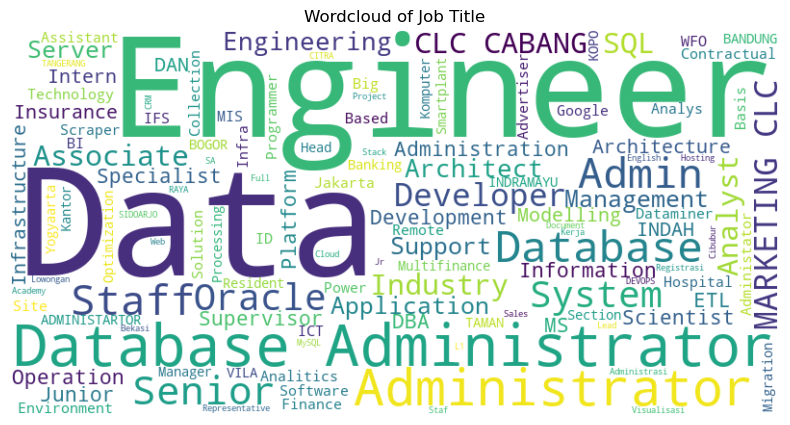

In [92]:
text = " ".join(df_job['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud of Job Title")

The visualization underscores a strong focus on data-centric and technical roles, particularly involving data engineering,data analist, system administration, and database management. At the same time, the spread of keywords indicates that employers are seeking candidates across a wide range of expertise levels and technical domains.

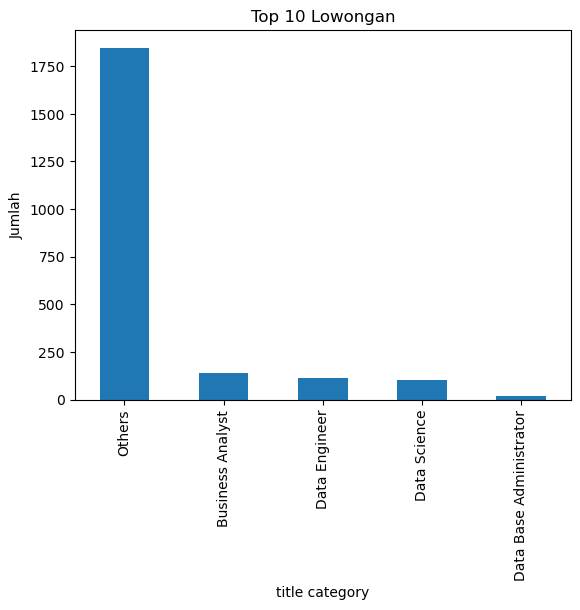

In [93]:
df["title category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Lowongan")
plt.ylabel("Jumlah")
plt.show()

## 2. Location With the Most Job Vacancies

In [94]:
# Filter hanya Data Scientist
df_ds = df[df['title category'] == 'Data Engineer']

# Hitung 10 lokasi teratas
most_location_ds = (
    df_ds['location']
    .value_counts()
    .head(5)
    .reset_index()
)

# Ganti nama kolom
most_location_ds.columns = ['location', 'count']

# Tampilkan
print(most_location_ds)

          location  count
0     Jakarta Raya     55
1  Jakarta Selatan     19
2   Kebayoran Lama      8
3    Jakarta Barat      6
4    Jakarta Pusat      5


In [96]:
most_location = df['location'].value_counts().head(10).reset_index()
most_location.columns = ['location', 'count']
most_location

,location,count
0,Jakarta Raya,699
1,Jakarta Selatan,225
2,Jakarta Pusat,105
3,Jakarta Barat,104
4,Jakarta Utara,90
5,Kebayoran Lama,86
6,Tangerang,61
7,Surabaya,41
8,Kecamatan Tangerang,41
9,Bandung,37


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_7184\1152556511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_location['count'] , y=most_location['location'], data=most_location, palette='crest_r')


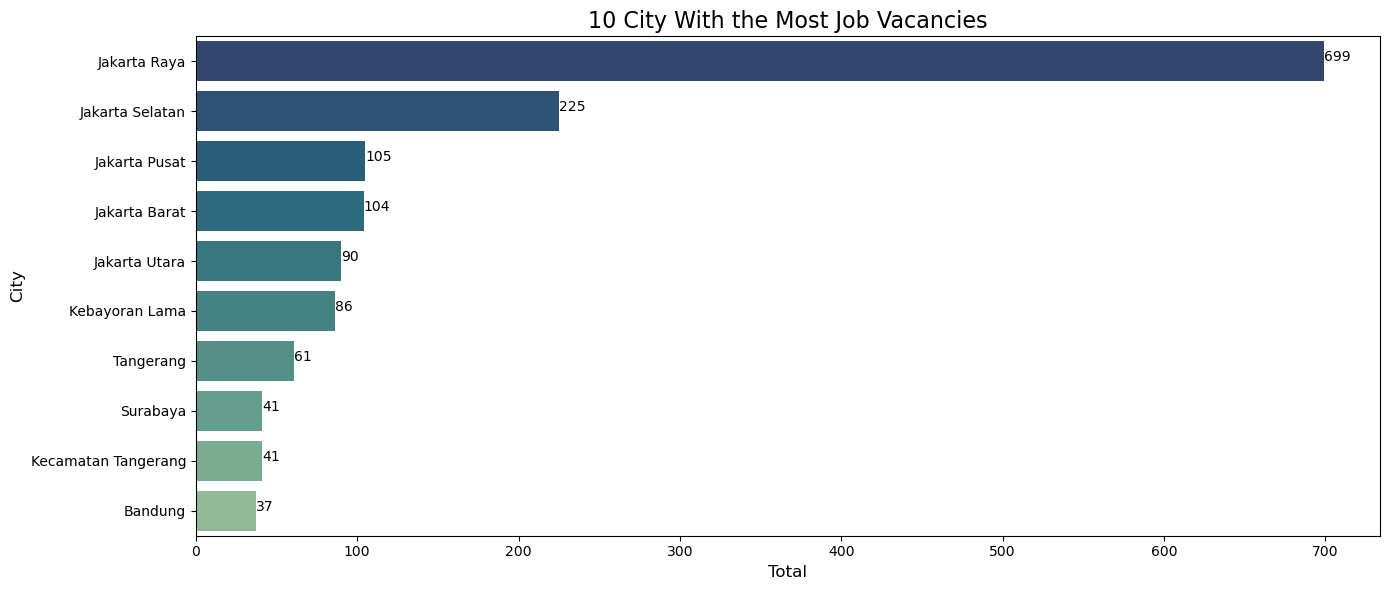

In [97]:
# Bar Chart Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x=most_location['count'] , y=most_location['location'], data=most_location, palette='crest_r')

# Add number in bar chart
for i, count in enumerate(most_location['count']):
    plt.text(count, i, str(count))

# Add title and label
plt.title('10 City With the Most Job Vacancies', fontsize=16)
plt.xlabel('Total', fontsize=12)
plt.ylabel('City', fontsize=12)

plt.tight_layout()
plt.show()

## Conclusion

* The analysis highlights that the Indonesian job market shows a strong concentration on data-related and technical roles. Positions such as Data Engineer, Business Analyst, and Data Scientist dominate job postings, reflecting the increasing demand for professionals skilled in data management, analysis, and system development.

* The word cloud further emphasizes the prominence of keywords like Data, Engineer, Database, Administrator, and System, underlining the market’s reliance on data-driven decision-making and digital infrastructure. At the same time, the diversity of terms (e.g., Junior, Senior, Associate, Intern) indicates that employers are seeking candidates across different experience levels, from entry-level to senior experts.

* From the location distribution, Jakarta remains the primary hub of employment opportunities, especially in data and business-related positions, while surrounding regions such as Tangerang, Surabaya, and Bandung are emerging as secondary centers of demand.